In [1]:
import pandas as pd

In [2]:
# 혈액형 0:A / 1:O / 2:B / 3:AB
df = pd.DataFrame({'이름':['강성관','손지영','김운비','채수민'],
                 '나이':[45,35,27,25],
                  '혈액형':[0,1,1,2],
                  '키':[175.5,160.2,165.5,158.2],})
df

,이름,나이,혈액형,키
0,강성관,45,0,175.5
1,손지영,35,1,160.2
2,김운비,27,1,165.5
3,채수민,25,2,158.2


In [24]:
# 범주형 데이터 접근 count : 빈도수 확인
# 혈액형 컬럼 인덱싱
display(df[['혈액형']])
# 행과 열에 편하게 접근할 수 있는 인덱서 : loc, iloc
# 대상.loc[행, 열] : 문자열
# 대상.iloc[행, 열] : 인덱스 번호
df.iloc[:,2]
df.loc[:,'혈액형']

,혈액형
0,0
1,1
2,1
3,2


0    0
1    1
2    1
3    2
Name: 혈액형, dtype: int64

In [22]:
df[['혈액형']].value_counts()

혈액형
1      2
0      1
2      1
dtype: int64

In [23]:
# 키의 평균
df['키'].mean()

164.85

In [25]:
# 키 데이터의 기술 통계 정보 확인
# descibe()
df['키'].describe()

count      4.000000
mean     164.850000
std        7.739294
min      158.200000
25%      159.700000
50%      162.850000
75%      168.000000
max      175.500000
Name: 키, dtype: float64

In [34]:
# 수치형 자료 -> 범주형 자료
# cut
# pd.cut(수치형, 구간설정, 구간이름설정<라벨링>)
b = [19,29,39,49] # 구간 20대 : 20~29 / 30대 : 30~39 / 40대 : 40~49
l = ['20대','30대','40대']
df['연령대'] = pd.cut(df['나이'],bins = b,labels = l)

In [42]:
# 30대의 평균 나이는?
df[df['연령대']=='30대']['나이'].mean()
# 불리언 인덱싱을 loc 인덱서랑 호환가능 // iloc는 에러뜸

35.0

In [45]:
df.loc[df['연령대']=='30대','나이'].mean()
# loc는 동시에 접근해서 계산의 속도가 빨라진다!

35.0

In [49]:
# 범주형 -> 숫자모양(수치형)
# 레이블인코딩, 원핫인코딩

# 레이블 인코딩
df['이름'].map({'강성관':0, '손지영':1,'김운비':3, '채수민':2})

0    0
1    1
2    3
3    2
Name: 이름, dtype: int64

In [51]:
# 원핫인코딩
pd.get_dummies(df['이름'],prefix='이름')

,이름_강성관,이름_김운비,이름_손지영,이름_채수민
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1


In [62]:
# 키 데이터 접근
# 정렬하는 함수
df['키'].sort_values( ascending=False )

0    175.5
2    165.5
1    160.2
3    158.2
Name: 키, dtype: float64

In [3]:
df.sort_values(by='키',ascending=False)

,이름,나이,혈액형,키
0,강성관,45,0,175.5
2,김운비,27,1,165.5
1,손지영,35,1,160.2
3,채수민,25,2,158.2


#### 분산, 표준편차 확인

In [7]:
# 그룹1
g1 = pd.Series([9000,9500,10000,10500,11000])
# 그룹2
g2 = pd.Series([7500,8000,10000,11000,13500])

# 어떤 그룹이 더치페이를 했을때 합리적일까
print('g1분산 : ',g1.var())
print('g2분산 : ',g2.var())
# 평균에서 떨어진 정도가 작은 그룹 g1, 더 합리적임

# 단위 문제를 해결한 표준편차(분산에 루트씌운것 , 분산의 제곱근)
print('g1 표준편차 : ', g1.std())
print('g2 표준편차 : ', g2.std())

g1분산 :  625000.0
g2분산 :  5875000.0
g1 표준편차 :  790.5694150420949
g2 표준편차 :  2423.8399287081643


### 사분위수(Quartile)

In [25]:
# boxplot 그려보기
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리
s = pd.Series([2,20,38,56,34,79,95,86,92,64,82,100])
s = s.sort_values()

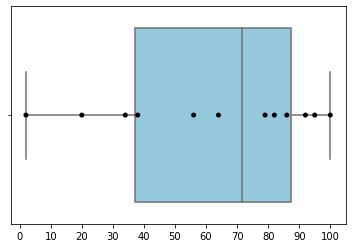

In [26]:
import warnings # 경고창 무시
warnings.filterwarnings(action='ignore')

sns.boxplot(s, color='skyblue')
sns.swarmplot(s,color='black')  # 데이터 점 찍기
plt.xticks(range(0,101,10)) # 눈금축설정
plt.show()

# boxplot의 선이 중앙값

#### 도수분포표, 히스토그램

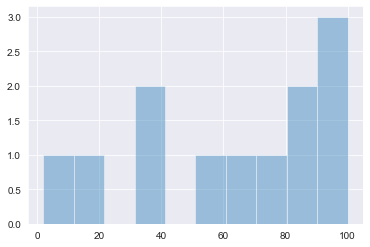

In [35]:
# 옵션 설정
sns.set_style('darkgrid')

# 히스토그램
sns.distplot(s, kde=False, bins=10)
plt.show()

### 상관관계 - 변수간의 상관관계

In [ ]:
# titanic 데이터 - train, test, submission(답안지)
# 머신러닝에서 데이터 분석(탐색적 데이터 분석)
# train 데이터를 기준으로 분석 진행
# 머신러닝 학습 시키는 데이터가 train

In [38]:
# 데이터 불러와서 Survived 컬럼에 관계있는 컬럼(변수)은 어떤 것인지 확인하기
data = pd.read_csv('data/train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# 상관계수 확인 : corr()
# 숫자 범위 : -1~1출력
# -1에 가까울수록 관계 o(반비례), 1에 가까울수록 관계 o(비례)
# 0에 가까울수록 관계 거의 없음
data.corr()

# Survived 변수와 가장 상관관계가 높은 변수는? 
# pclass가 다른 변수보다 상관이 있음을 알 수 있다!!!

# Fare요금 기준으로 가장 상관관계가 높은 변수는? Pclass
d_corr = data.corr()
d_corr['Fare'].abs().sort_values()

PassengerId    0.012658
Age            0.096067
SibSp          0.159651
Parch          0.216225
Survived       0.257307
Pclass         0.549500
Fare           1.000000
Name: Fare, dtype: float64